## Data Cube

### Import required packages

In [18]:
# Suppress warnings
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')
from pprint import pprint

import earthaccess
import xarray as xr

## Create our data cube

1) Authenticate

In [19]:
auth = earthaccess.login()
# are we authenticated?
if not auth.authenticated:
    # ask for credentials and persist them in a .netrc file
    auth.login(strategy="interactive", persist=True)

2) Get a vector of urls to our nc files

In [ ]:
short_name = 'AVHRR_OI-NCEI-L4-GLOB-v2.1'
version = "2.1"

date_start = "2021-05-02"
date_end = "2021-05-03"
date_range = (date_start, date_end)

min_lon = -20
max_lon = -17
min_lat = 12
max_lat = 15

#min_lon = -20
#max_lon = -10
#min_lat = 10
#max_lat = 20

# min lon, min lat, max lon, max lat
bbox = (min_lon, min_lat, max_lon, max_lat)  

results = earthaccess.search_data(
    short_name = short_name,
    version = version,
    temporal = date_range,
    cloud_hosted=True
)
len(results)

3) Create our data cube and save

This will take a few minutes to run. But to speed things up, I have uploaded `littlecube.nc` to the website.

In [ ]:
fileset = earthaccess.open(results)
ds = xr.open_mfdataset(fileset)

In [22]:
ds

<xarray.Dataset> Size: 50MB
Dimensions:           (time: 3, lat: 720, nv: 2, lon: 1440)
Coordinates:
  * lat               (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon               (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
  * time              (time) datetime64[ns] 24B 2021-05-01 2021-05-02 2021-05-03
Dimensions without coordinates: nv
Data variables:
    lat_bnds          (time, lat, nv) float32 17kB dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds          (time, lon, nv) float32 35kB dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    analysed_sst      (time, lat, lon) float32 12MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 12MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    mask              (time, lat, lon) float32 12MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 12MB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    id:                         NCEI-L4_GHRSST-SSTblend-AVHRR_OI
    references:                 Reynolds, et al.(2009) What is New in Version...
    institution:                NOAA/NESDIS/NCEI
    creator_name:               NCEI Products and Services
    ...                         ...
    metadata_link:              http://podaac.jpl.nasa.gov/ws/metadata/datase...
    keywords:                   Oceans>Ocean Temperature>Sea Surface Temperature
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    standard_name_vocabulary:   CF Standard Name Table v29
    processing_level:           L4
    cdm_data_type:              Grid

In [23]:
dc = ds['analysed_sst'].sel(lat=slice(33.5, 35.5), lon=slice(-75.5, -73.5))

In [ ]:
dc = xr.open_dataset("littlecube.nc")['analysed_sst']

In [17]:
dc.to_netcdf("littlecube.nc"); 


<xarray.Dataset> Size: 24B
Dimensions:           ()
Data variables:
    lat_bnds          float32 4B dask.array<chunksize=(), meta=np.ndarray>
    lon_bnds          float32 4B dask.array<chunksize=(), meta=np.ndarray>
    analysed_sst      float32 4B dask.array<chunksize=(), meta=np.ndarray>
    analysis_error    float32 4B dask.array<chunksize=(), meta=np.ndarray>
    mask              float32 4B dask.array<chunksize=(), meta=np.ndarray>
    sea_ice_fraction  float32 4B dask.array<chunksize=(), meta=np.ndarray>

4) Load our data cube

In [53]:
dc

<xarray.DataArray 'analysed_sst' (time: 366, lat: 40, lon: 40)> Size: 2MB
dask.array<getitem, shape=(366, 40, 40), dtype=float32, chunksize=(1, 40, 40), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 160B 10.12 10.38 10.62 10.88 ... 19.38 19.62 19.88
  * lon      (lon) float32 160B -19.88 -19.62 -19.38 ... -10.62 -10.38 -10.12
  * time     (time) datetime64[ns] 3kB 2020-12-31 2021-01-01 ... 2021-12-31
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_temperature
    units:          kelvin
    valid_min:      -300
    valid_max:      4500
    source:         UNKNOWN,ICOADS SHIPS,ICOADS BUOYS,ICOADS argos,MMAB_50KM-...
    comment:        Single-sensor Pathfinder 5.0/5.1 AVHRR SSTs used until 20...

## Means

Overall mean, all the data.

In [25]:
dc.mean(dim=['lat', 'lon'])

<xarray.DataArray 'analysed_sst' (time: 366)> Size: 1kB
array([298.0009 , 297.93494, 297.8632 , 297.705  , 297.67633, 297.68054,
       297.5338 , 297.4928 , 297.2984 , 297.12088, 296.79187, 296.30276,
       295.7573 , 295.36798, 295.17255, 295.0154 , 294.79138, 294.8736 ,
       294.94785, 294.944  , 294.74103, 294.98236, 294.8119 , 294.77744,
       294.7462 , 294.67908, 294.80896, 294.7763 , 294.82916, 294.9329 ,
       294.88654, 295.085  , 295.41492, 295.5869 , 295.61557, 295.78583,
       295.6895 , 294.59256, 294.5807 , 294.29895, 294.43442, 294.72232,
       294.49072, 294.3009 , 294.23444, 293.9674 , 293.99695, 294.05075,
       294.16248, 294.12674, 294.1707 , 294.1432 , 293.9618 , 293.8546 ,
       293.86166, 293.84366, 293.77115, 293.51007, 293.43283, 293.54233,
       293.6898 , 293.8023 , 293.86847, 293.86945, 293.8946 , 293.86215,
       293.61633, 293.45273, 293.46228, 293.4363 , 293.39606, 293.5459 ,
       293.6649 , 293.7366 , 294.2489 , 294.18152, 294.09918, 294.20154,
       294.1575 , 294.07867, 294.1065 , 294.11923, 294.16873, 294.03735,
       293.7623 , 293.63025, 293.44687, 293.4382 , 293.70285, 293.46994,
       293.26794, 293.32526, 293.55066, 294.06207, 294.55756, 294.68518,
       294.78467, 295.02405, 295.47284, 295.35117, 295.23688, 295.5925 ,
       295.81424, 295.53687, 295.16098, 294.9305 , 294.82977, 294.9739 ,
       295.23074, 295.39062, 295.45563, 295.57645, 295.8611 , 295.549  ,
       295.43866, 295.3756 , 295.6471 , 296.05676, 295.9936 , 295.77246,
...
       301.62402, 301.49713, 301.8656 , 301.83624, 301.68515, 301.3447 ,
       301.31693, 301.82416, 301.90854, 301.67313, 301.44574, 301.02615,
       301.09137, 301.09875, 301.1012 , 301.17526, 301.54276, 301.8236 ,
       301.90897, 301.7997 , 301.73035, 301.66873, 301.7707 , 301.87158,
       302.26318, 302.22168, 302.2768 , 302.36893, 302.48352, 302.5139 ,
       302.297  , 302.30328, 302.42285, 302.50357, 302.64645, 302.63297,
       302.3015 , 302.27026, 302.21225, 302.2666 , 302.15744, 302.16742,
       302.0023 , 302.32416, 302.31967, 302.33426, 302.36942, 302.42368,
       302.35623, 302.34958, 302.34818, 302.24924, 302.35657, 302.33914,
       302.26627, 302.10498, 302.00616, 302.12857, 302.12485, 302.1047 ,
       301.99106, 301.9295 , 301.84393, 301.51443, 301.2795 , 301.33765,
       301.4075 , 301.46542, 301.4883 , 301.3905 , 301.25766, 301.28885,
       301.2645 , 301.1543 , 301.06604, 301.14487, 301.24533, 301.26028,
       301.325  , 301.20932, 300.95596, 300.61432, 300.15082, 299.8031 ,
       299.6314 , 299.64636, 299.65866, 299.6017 , 299.5674 , 299.4872 ,
       299.45264, 299.3552 , 299.2998 , 299.2894 , 299.39468, 299.45694,
       299.2429 , 299.601  , 299.73438, 299.66956, 299.57117, 299.52686,
       299.28665, 299.03375, 298.937  , 298.82678, 298.77457, 298.6344 ,
       298.7003 , 298.68777, 298.69916, 298.69797, 298.55707, 298.38477],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-12-31 2021-01-01 ... 2021-12-31

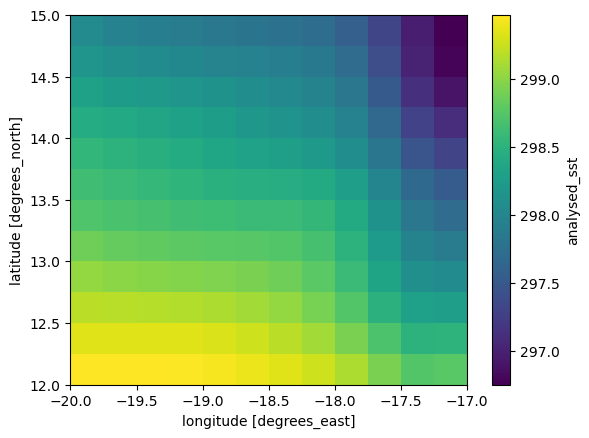

In [26]:
dc.mean(dim=['time']).plot()

In [45]:
dc_monthly = dc.resample(time='1MS').mean()
dc_monthly

<xarray.DataArray 'analysed_sst' (time: 2, lat: 40, lon: 40)> Size: 13kB
dask.array<transpose, shape=(2, 40, 40), dtype=float32, chunksize=(1, 40, 40), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 160B 10.12 10.38 10.62 10.88 ... 19.38 19.62 19.88
  * lon      (lon) float32 160B -19.88 -19.62 -19.38 ... -10.62 -10.38 -10.12
  * time     (time) datetime64[ns] 16B 2021-05-01 2021-06-01
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_temperature
    units:          kelvin
    valid_min:      -300
    valid_max:      4500
    source:         UNKNOWN,ICOADS SHIPS,ICOADS BUOYS,ICOADS argos,MMAB_50KM-...
    comment:        Single-sensor Pathfinder 5.0/5.1 AVHRR SSTs used until 20...

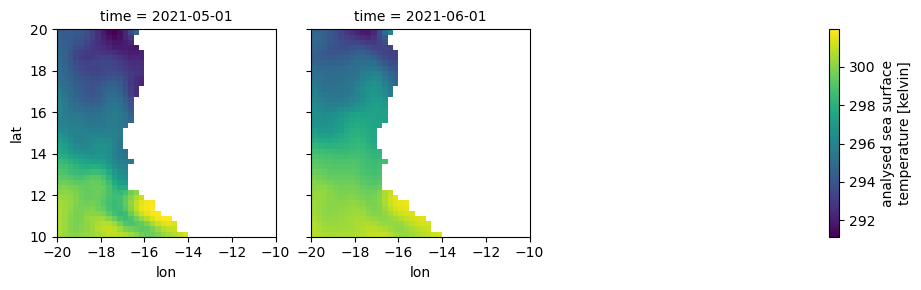

In [46]:
dc_monthly.plot(x='lon', y='lat', col="time", col_wrap=3);